# Profit Estimation Analysis

Dataset: 1000 Companies

Prediction of the profit of 1000 companies based on Research & Development(R&D) Spend, Marketing Spend, State and Adminstration. Use Expenditure and Location to calculate the profit.

Independant variable X: R&D Spend,Administration,Marketing Spend, State

Dependant variable Y: Profit

<a id="cont"></a>

## Table of Contents

- [1. Importing Packages](#one)
- [2. Loading the Data](#two)
- [3. Exploratory Data Analysis (EDA)](#three)
- [4. Data Preprocessing](#four)
- [5. Creating Train and Test Dataset](#five)
- [6. Model Training](#six)
- [7. Model Testing](#seven)
- [8. Model Evaluation](#eight)

<a id="one"></a>
# 1. Importing Packages
[Back to Table of Contents](#cont)

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id="two"></a>
# 2. Loading the Data
[Back to Table of Contents](#cont)

---



In [2]:
companies = pd.read_csv("1000_Companies.csv")

In [3]:
X = companies.iloc[:, :-1].values

In [4]:
y = companies.iloc[:,4].values

In [5]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<a id="three"></a>
# 3. Exploratory Data Analysis (EDA)
[Back to Table of Contents](#cont)

---

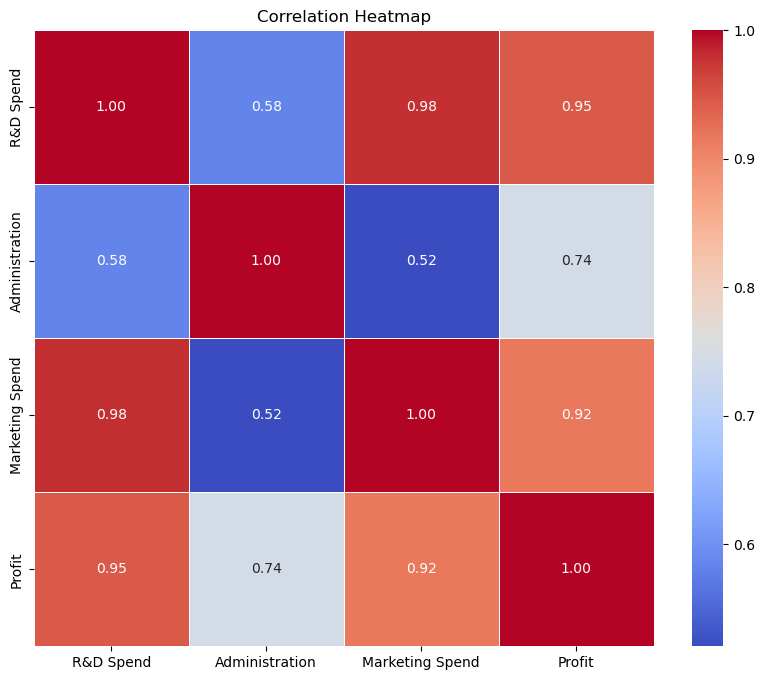

In [17]:
#Correlation Matrix
# sns.heatmap(companies.corr())
# Correlation Matrix
correlation_heatmap = companies[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


<a id="four"></a>
# 4. Data Preprocessing
[Back to Table of Contents](#cont)

---


In [22]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [3])],    
    remainder='passthrough'                        
)
X = column_transformer.fit_transform(X)

In [25]:
#Avoiding Dummy Variable Trap(remove the other column created in the previous step)
X = X[:,1:]


<a id="five"></a>
# 5. Creating Train and Test Dataset
[Back to Table of Contents](#cont)

---

In [27]:
#Splitting the dataset into Train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state = 0)

<a id="six"></a>
# 6. Model Training
[Back to Table of Contents](#cont)

---

In [28]:
#Fit Multiple Linear Regression Model into the Train set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

<a id="seven"></a>
# 7. Model Testing
[Back to Table of Contents](#cont)

---

In [29]:
#Predict the Test set results
y_pred = regressor.predict(X_test)

In [30]:
y_pred

array([ 89896.13560404,  88562.75109756,  94887.30651395, 174747.72023756,
        84341.06631724, 110900.50684928, 169762.18978689,  91541.67798113,
       163730.72563736,  54998.21728997,  67560.89729515, 150188.77595231,
       126199.60384888,  60116.93668766, 175679.15927616,  76424.6731863 ,
       118585.29903066, 163025.85283588, 165373.46410366, 180816.33968842,
       101611.90106507,  85866.61261904, 179941.96170712,  84375.47086056,
       104774.82635513, 101085.99176766,  41176.34613386,  58397.55050945,
        69464.05397504, 226504.894275  , 121059.90611405, 111345.24805057,
       102017.4308966 , 137860.2144515 ,  64646.58373968, 108541.70028035,
       184674.67920308, 170603.23571996, 173734.04591357, 118021.40069485,
        97366.10933911, 163884.28725193, 107433.20380238,  52036.91225355,
       116889.40855343,  59427.16827933, 157865.17674616,  79756.87553344,
       159147.37396752, 131189.93574075, 183744.07931955, 173699.64148019,
        93763.70569404,  

In [31]:
#Calculate Coefficient/Gradient
regressor.coef_

array([ 1.66850593e-07,  0.00000000e+00, -3.90842495e-08, ...,
       -9.18374263e-07,  1.04354079e+00,  3.55023839e-01])

In [32]:
#Calculate Intercept/Slope
regressor.intercept_

-89058.35581072734

<a id="eight"></a>
# 8. Model Evaluation
[Back to Table of Contents](#cont)

---

In [33]:
#Calculate R squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8989590247135772